<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/BasicLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Logistic Regression"

/content/drive/My Drive/Colab Notebooks/Logistic Regression


In [ ]:
#Reading the csv file
columnnames=["X","Y","Z"]
dataset=pd.read_csv("ex2data1.txt",names=columnnames)
print(dataset)

            X          Y  Z
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]


In [ ]:
dataset.describe()

,X,Y,Z
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
#Separating the feature matrix and target variable
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [ ]:
Y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Separating positive and negative values of target variables
pos,neg=(Y==1).reshape(100,1),(Y==0).reshape(100,1)

In [ ]:
neg

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

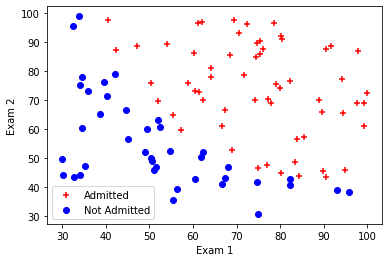

In [ ]:
#Plotting the scatter plot
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",c="b")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend(["Admitted","Not Admitted"])

In [ ]:
#Defining the sigmoid function
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [ ]:
sigmoid(-100)

3.7200759760208356e-44

In [ ]:
#Defining the function for normalization
def featurenormalization(X):
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  X_norm=(X-mean)/std
  return X_norm,mean,std

In [ ]:
#Defining the cost function
def costfunction(theta,X,Y):
  m=len(Y)
  error=0
  for i in range(m):
    prediction=sigmoid(np.dot(X[i],theta))
    error=error+((-Y[i]*np.log(prediction))-((1-Y[i])*np.log(1-prediction)))
  cost=(1/m)*error
  gradient=(1/m)*np.dot(X.transpose(),(prediction-Y)) #X ==> (100,2)  prediction-Y ==> (100,1)

  print("Cost is: ",cost)
  return cost,gradient

In [ ]:
m,n=X.shape[0],X.shape[1]
X,X_mean,X_std=featurenormalization(X)
X=np.append(np.ones((m,1)),X,axis=1)
Y=Y.reshape(m,1)
initial_theta=np.zeros((n+1,1))
costfunction(initial_theta,X,Y)

Cost is:  [0.69314718]


(array([0.69314718]), array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [ ]:
#defining the gradient descent function
def gradientDescent(X,Y,theta,alpha,num_iters):
  m=len(Y)
  cost_function_values=[]

  for i in range(num_iters):
    cost,grad=costfunction(theta,X,Y)
    cost_function_values.append(cost)
    theta=theta-(alpha*grad)

    if i%10==0:
      plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
      plt.scatter(X[neg[:,0],1],X[neg[:,0],2],marker="o",c="b")
      x_value=np.array([np.min(X[:,1]),np.max(X[:,1])])
      y_value=-(theta[0]+theta[1]*x_value)/theta[2]
      plt.plot(x_value,y_value,"g")
      plt.xlabel("Exam 1")
      plt.ylabel("Exam 2")
      plt.legend(["Admitted","Not Admitted"])
      plt.show()
  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost/loss Values")
  plt.title("Cost Function Curve")
  plt.show()
  return theta,cost_function_values
      

Cost is:  [0.69314718]


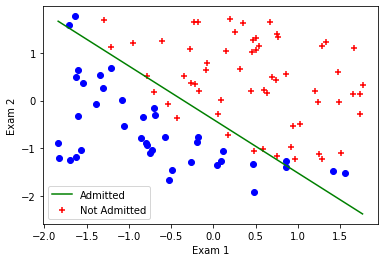

Cost is:  [0.69238723]
Cost is:  [0.69162854]
Cost is:  [0.69087113]
Cost is:  [0.69011499]
Cost is:  [0.68936011]
Cost is:  [0.6886065]
Cost is:  [0.68785415]
Cost is:  [0.68710306]
Cost is:  [0.68635324]
Cost is:  [0.68560467]


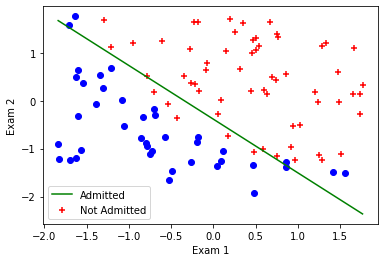

Cost is:  [0.68485736]
Cost is:  [0.6841113]
Cost is:  [0.6833665]
Cost is:  [0.68262295]
Cost is:  [0.68188064]
Cost is:  [0.68113959]
Cost is:  [0.68039979]
Cost is:  [0.67966123]
Cost is:  [0.67892391]
Cost is:  [0.67818784]


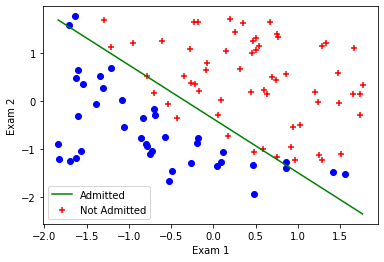

Cost is:  [0.677453]
Cost is:  [0.67671941]
Cost is:  [0.67598705]
Cost is:  [0.67525593]
Cost is:  [0.67452604]
Cost is:  [0.67379738]
Cost is:  [0.67306996]
Cost is:  [0.67234376]
Cost is:  [0.6716188]
Cost is:  [0.67089506]


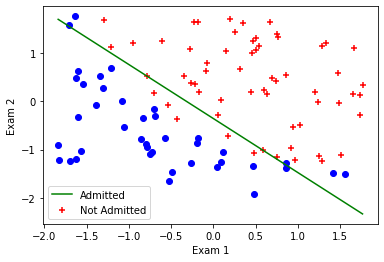

Cost is:  [0.67017254]
Cost is:  [0.66945125]
Cost is:  [0.66873118]
Cost is:  [0.66801233]
Cost is:  [0.66729469]
Cost is:  [0.66657828]
Cost is:  [0.66586308]
Cost is:  [0.6651491]
Cost is:  [0.66443632]
Cost is:  [0.66372476]


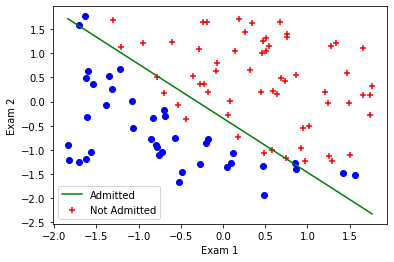

Cost is:  [0.66301441]
Cost is:  [0.66230527]
Cost is:  [0.66159734]
Cost is:  [0.66089061]
Cost is:  [0.66018508]
Cost is:  [0.65948076]
Cost is:  [0.65877763]
Cost is:  [0.65807571]
Cost is:  [0.65737499]
Cost is:  [0.65667546]


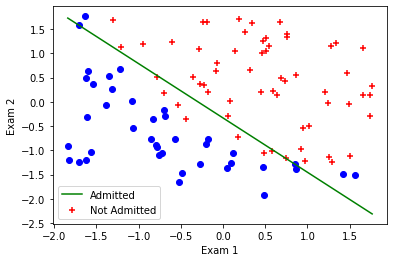

Cost is:  [0.65597712]
Cost is:  [0.65527999]
Cost is:  [0.65458404]
Cost is:  [0.65388929]
Cost is:  [0.65319572]
Cost is:  [0.65250334]
Cost is:  [0.65181215]
Cost is:  [0.65112215]
Cost is:  [0.65043333]
Cost is:  [0.64974569]


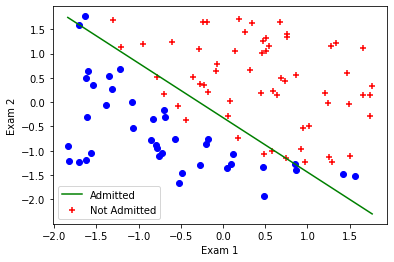

Cost is:  [0.64905924]
Cost is:  [0.64837396]
Cost is:  [0.64768987]
Cost is:  [0.64700695]
Cost is:  [0.6463252]
Cost is:  [0.64564464]
Cost is:  [0.64496524]
Cost is:  [0.64428702]
Cost is:  [0.64360997]
Cost is:  [0.64293409]


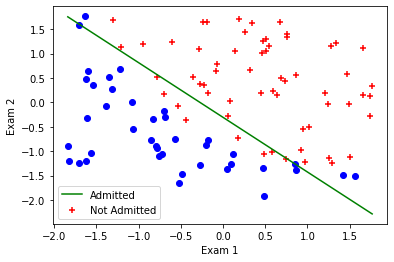

Cost is:  [0.64225937]
Cost is:  [0.64158583]
Cost is:  [0.64091345]
Cost is:  [0.64024223]
Cost is:  [0.63957218]
Cost is:  [0.63890328]
Cost is:  [0.63823555]
Cost is:  [0.63756898]
Cost is:  [0.63690357]
Cost is:  [0.63623931]


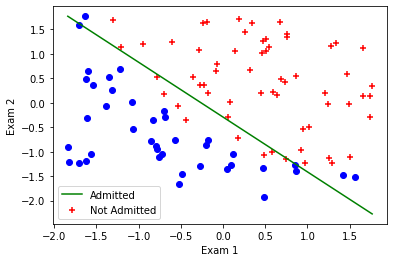

Cost is:  [0.63557621]
Cost is:  [0.63491426]
Cost is:  [0.63425347]
Cost is:  [0.63359383]
Cost is:  [0.63293534]
Cost is:  [0.63227799]
Cost is:  [0.6316218]
Cost is:  [0.63096675]
Cost is:  [0.63031285]
Cost is:  [0.6296601]


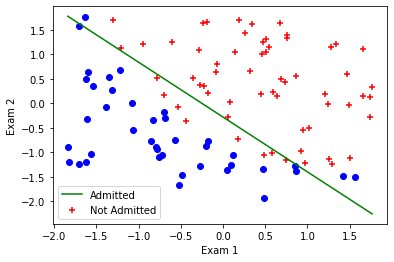

Cost is:  [0.62900848]
Cost is:  [0.62835801]
Cost is:  [0.62770868]
Cost is:  [0.62706049]
Cost is:  [0.62641344]
Cost is:  [0.62576753]
Cost is:  [0.62512275]
Cost is:  [0.62447911]
Cost is:  [0.6238366]
Cost is:  [0.62319522]


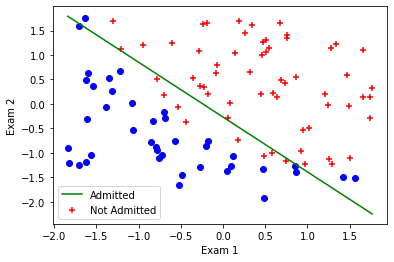

Cost is:  [0.62255498]
Cost is:  [0.62191586]
Cost is:  [0.62127788]
Cost is:  [0.62064102]
Cost is:  [0.6200053]
Cost is:  [0.61937069]
Cost is:  [0.61873722]
Cost is:  [0.61810486]
Cost is:  [0.61747363]
Cost is:  [0.61684352]


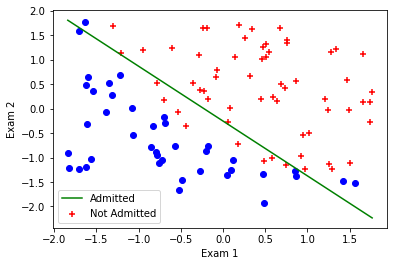

Cost is:  [0.61621453]
Cost is:  [0.61558666]
Cost is:  [0.61495991]
Cost is:  [0.61433428]
Cost is:  [0.61370976]
Cost is:  [0.61308636]
Cost is:  [0.61246407]
Cost is:  [0.61184289]
Cost is:  [0.61122283]
Cost is:  [0.61060388]


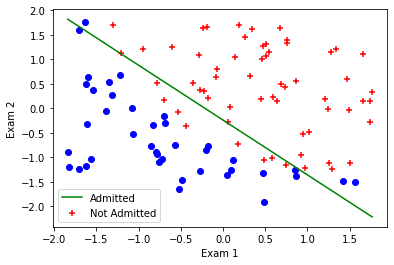

Cost is:  [0.60998603]
Cost is:  [0.6093693]
Cost is:  [0.60875367]
Cost is:  [0.60813915]
Cost is:  [0.60752574]
Cost is:  [0.60691343]
Cost is:  [0.60630222]
Cost is:  [0.60569212]
Cost is:  [0.60508312]
Cost is:  [0.60447521]


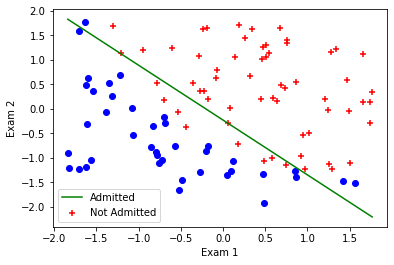

Cost is:  [0.60386841]
Cost is:  [0.60326271]
Cost is:  [0.6026581]
Cost is:  [0.60205459]
Cost is:  [0.60145218]
Cost is:  [0.60085086]
Cost is:  [0.60025063]
Cost is:  [0.5996515]
Cost is:  [0.59905345]
Cost is:  [0.5984565]


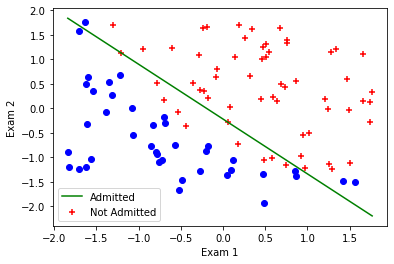

Cost is:  [0.59786064]
Cost is:  [0.59726587]
Cost is:  [0.59667218]
Cost is:  [0.59607958]
Cost is:  [0.59548807]
Cost is:  [0.59489764]
Cost is:  [0.5943083]
Cost is:  [0.59372003]
Cost is:  [0.59313285]
Cost is:  [0.59254676]


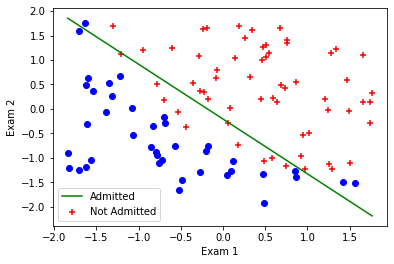

Cost is:  [0.59196174]
Cost is:  [0.5913778]
Cost is:  [0.59079494]
Cost is:  [0.59021315]
Cost is:  [0.58963244]
Cost is:  [0.58905281]
Cost is:  [0.58847426]
Cost is:  [0.58789677]
Cost is:  [0.58732036]
Cost is:  [0.58674502]


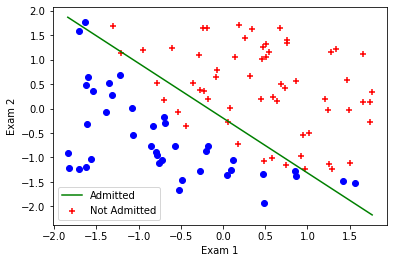

Cost is:  [0.58617075]
Cost is:  [0.58559756]
Cost is:  [0.58502543]
Cost is:  [0.58445437]
Cost is:  [0.58388437]
Cost is:  [0.58331545]
Cost is:  [0.58274759]
Cost is:  [0.58218079]
Cost is:  [0.58161506]
Cost is:  [0.58105039]


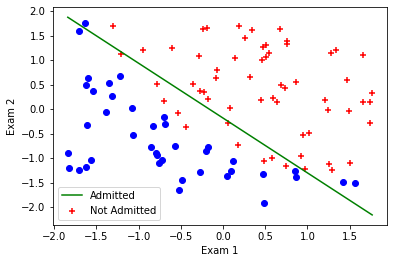

Cost is:  [0.58048678]
Cost is:  [0.57992423]
Cost is:  [0.57936275]
Cost is:  [0.57880232]
Cost is:  [0.57824296]
Cost is:  [0.57768465]
Cost is:  [0.57712739]
Cost is:  [0.5765712]
Cost is:  [0.57601606]
Cost is:  [0.57546197]


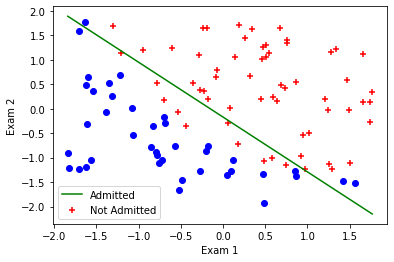

Cost is:  [0.57490894]
Cost is:  [0.57435696]
Cost is:  [0.57380603]
Cost is:  [0.57325615]
Cost is:  [0.57270733]
Cost is:  [0.57215955]
Cost is:  [0.57161282]
Cost is:  [0.57106714]
Cost is:  [0.57052251]
Cost is:  [0.56997892]


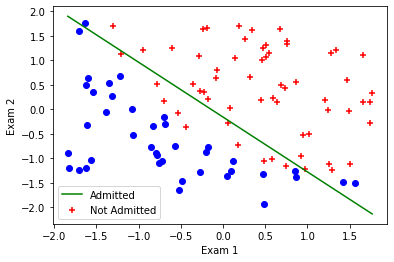

Cost is:  [0.56943638]
Cost is:  [0.56889488]
Cost is:  [0.56835443]
Cost is:  [0.56781502]
Cost is:  [0.56727665]
Cost is:  [0.56673932]
Cost is:  [0.56620304]
Cost is:  [0.56566779]
Cost is:  [0.56513358]
Cost is:  [0.56460041]


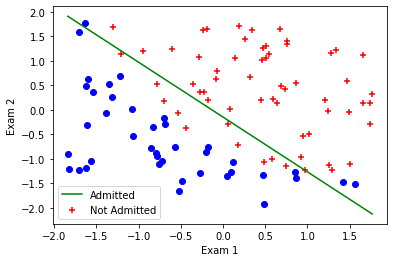

Cost is:  [0.56406828]
Cost is:  [0.56353719]
Cost is:  [0.56300713]
Cost is:  [0.5624781]
Cost is:  [0.56195011]
Cost is:  [0.56142316]
Cost is:  [0.56089723]
Cost is:  [0.56037234]
Cost is:  [0.55984848]
Cost is:  [0.55932565]


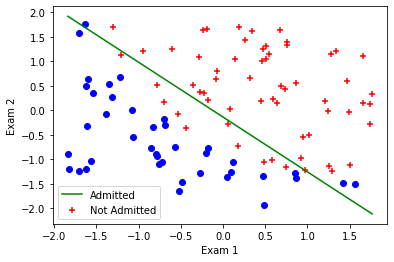

Cost is:  [0.55880385]
Cost is:  [0.55828308]
Cost is:  [0.55776334]
Cost is:  [0.55724462]
Cost is:  [0.55672694]
Cost is:  [0.55621027]
Cost is:  [0.55569463]
Cost is:  [0.55518002]
Cost is:  [0.55466643]
Cost is:  [0.55415387]


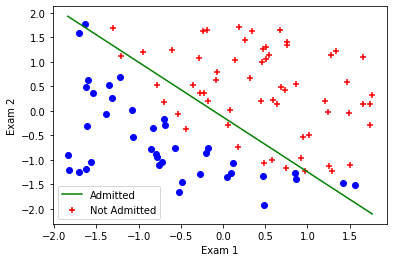

Cost is:  [0.55364232]
Cost is:  [0.5531318]
Cost is:  [0.5526223]
Cost is:  [0.55211381]
Cost is:  [0.55160635]
Cost is:  [0.55109991]
Cost is:  [0.55059448]
Cost is:  [0.55009007]
Cost is:  [0.54958667]
Cost is:  [0.5490843]


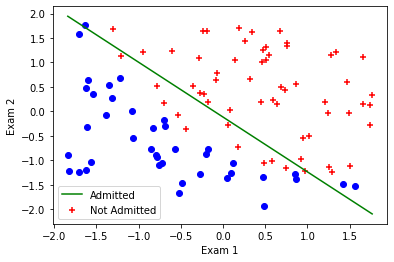

Cost is:  [0.54858293]
Cost is:  [0.54808258]
Cost is:  [0.54758325]
Cost is:  [0.54708493]
Cost is:  [0.54658761]
Cost is:  [0.54609131]
Cost is:  [0.54559603]
Cost is:  [0.54510175]
Cost is:  [0.54460848]
Cost is:  [0.54411621]


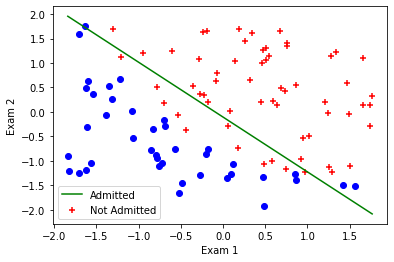

Cost is:  [0.54362496]
Cost is:  [0.54313471]
Cost is:  [0.54264547]
Cost is:  [0.54215723]
Cost is:  [0.54167]
Cost is:  [0.54118378]
Cost is:  [0.54069855]
Cost is:  [0.54021433]
Cost is:  [0.53973111]
Cost is:  [0.5392489]


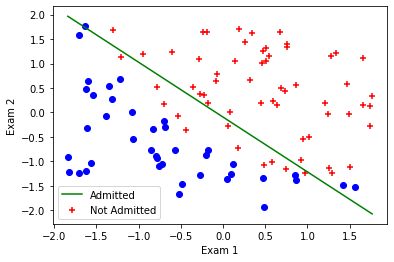

Cost is:  [0.53876768]
Cost is:  [0.53828746]
Cost is:  [0.53780824]
Cost is:  [0.53733003]
Cost is:  [0.5368528]
Cost is:  [0.53637658]
Cost is:  [0.53590135]
Cost is:  [0.53542712]
Cost is:  [0.53495388]
Cost is:  [0.53448164]


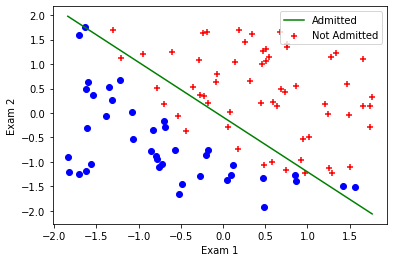

Cost is:  [0.53401039]
Cost is:  [0.53354014]
Cost is:  [0.53307087]
Cost is:  [0.5326026]
Cost is:  [0.53213532]
Cost is:  [0.53166903]
Cost is:  [0.53120373]
Cost is:  [0.53073942]
Cost is:  [0.5302761]
Cost is:  [0.52981376]


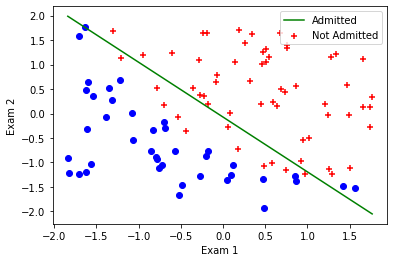

Cost is:  [0.52935241]
Cost is:  [0.52889205]
Cost is:  [0.52843267]
Cost is:  [0.52797428]
Cost is:  [0.52751687]
Cost is:  [0.52706045]
Cost is:  [0.52660501]
Cost is:  [0.52615055]
Cost is:  [0.52569707]
Cost is:  [0.52524457]


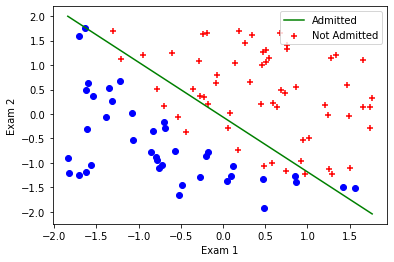

Cost is:  [0.52479306]
Cost is:  [0.52434252]
Cost is:  [0.52389296]
Cost is:  [0.52344438]
Cost is:  [0.52299678]
Cost is:  [0.52255015]
Cost is:  [0.5221045]
Cost is:  [0.52165983]
Cost is:  [0.52121613]
Cost is:  [0.52077341]


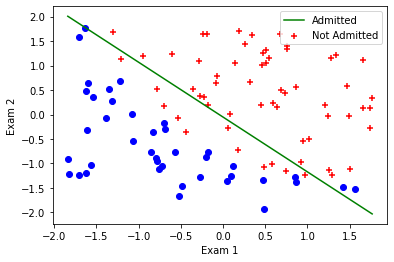

Cost is:  [0.52033165]
Cost is:  [0.51989088]
Cost is:  [0.51945107]
Cost is:  [0.51901224]
Cost is:  [0.51857437]
Cost is:  [0.51813748]
Cost is:  [0.51770156]
Cost is:  [0.5172666]
Cost is:  [0.51683262]
Cost is:  [0.5163996]


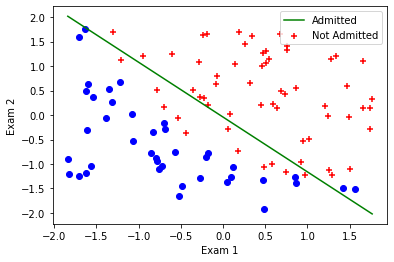

Cost is:  [0.51596755]
Cost is:  [0.51553646]
Cost is:  [0.51510634]
Cost is:  [0.51467719]
Cost is:  [0.514249]
Cost is:  [0.51382177]
Cost is:  [0.51339551]
Cost is:  [0.51297021]
Cost is:  [0.51254587]
Cost is:  [0.51212249]


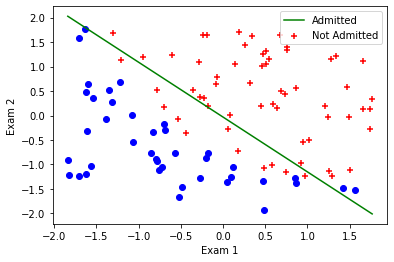

Cost is:  [0.51170008]
Cost is:  [0.51127862]
Cost is:  [0.51085812]
Cost is:  [0.51043858]
Cost is:  [0.51002]
Cost is:  [0.50960238]
Cost is:  [0.50918571]
Cost is:  [0.50877]
Cost is:  [0.50835524]
Cost is:  [0.50794144]


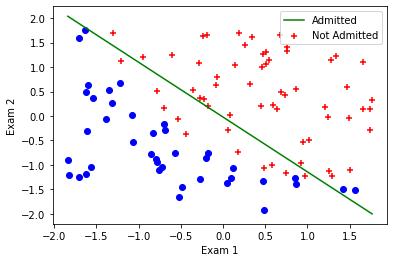

Cost is:  [0.50752859]
Cost is:  [0.5071167]
Cost is:  [0.50670575]
Cost is:  [0.50629577]
Cost is:  [0.50588673]
Cost is:  [0.50547864]
Cost is:  [0.5050715]
Cost is:  [0.50466531]
Cost is:  [0.50426008]
Cost is:  [0.50385579]


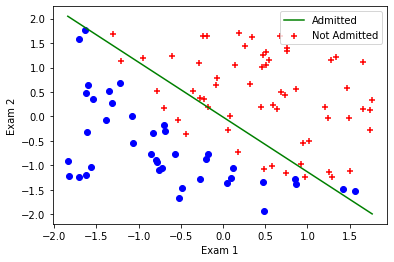

Cost is:  [0.50345244]
Cost is:  [0.50305005]
Cost is:  [0.5026486]
Cost is:  [0.50224809]
Cost is:  [0.50184853]
Cost is:  [0.50144992]
Cost is:  [0.50105225]
Cost is:  [0.50065552]
Cost is:  [0.50025973]
Cost is:  [0.49986489]


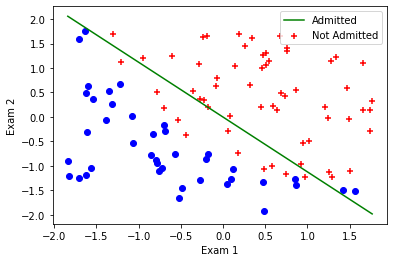

Cost is:  [0.49947099]
Cost is:  [0.49907802]
Cost is:  [0.498686]
Cost is:  [0.49829492]
Cost is:  [0.49790477]
Cost is:  [0.49751557]
Cost is:  [0.4971273]
Cost is:  [0.49673996]
Cost is:  [0.49635357]
Cost is:  [0.4959681]


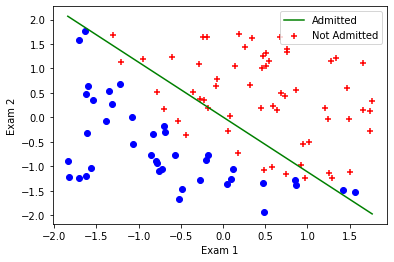

Cost is:  [0.49558358]
Cost is:  [0.49519998]
Cost is:  [0.49481732]
Cost is:  [0.4944356]
Cost is:  [0.4940548]
Cost is:  [0.49367494]
Cost is:  [0.49329601]
Cost is:  [0.492918]
Cost is:  [0.49254093]
Cost is:  [0.49216479]


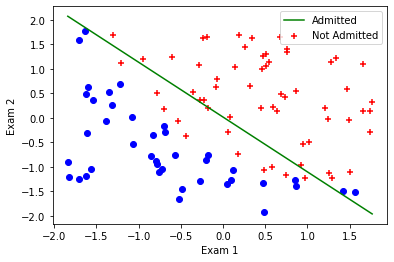

Cost is:  [0.49178957]
Cost is:  [0.49141528]
Cost is:  [0.49104192]
Cost is:  [0.49066949]
Cost is:  [0.49029798]
Cost is:  [0.4899274]
Cost is:  [0.48955774]
Cost is:  [0.489189]
Cost is:  [0.48882119]
Cost is:  [0.4884543]


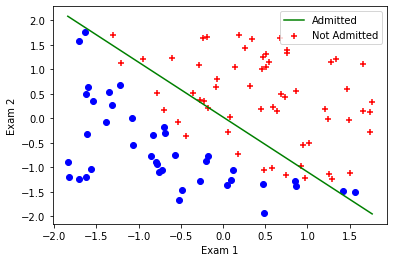

Cost is:  [0.48808833]
Cost is:  [0.48772328]
Cost is:  [0.48735915]
Cost is:  [0.48699595]
Cost is:  [0.48663366]
Cost is:  [0.48627229]
Cost is:  [0.48591184]
Cost is:  [0.4855523]
Cost is:  [0.48519369]
Cost is:  [0.48483599]


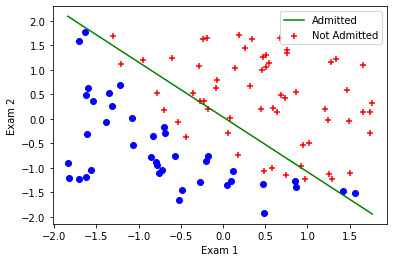

Cost is:  [0.4844792]
Cost is:  [0.48412333]
Cost is:  [0.48376837]
Cost is:  [0.48341433]
Cost is:  [0.4830612]
Cost is:  [0.48270898]
Cost is:  [0.48235767]
Cost is:  [0.48200727]
Cost is:  [0.48165778]
Cost is:  [0.48130921]


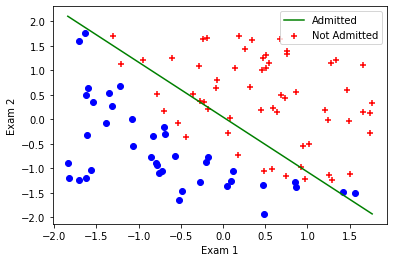

Cost is:  [0.48096154]
Cost is:  [0.48061478]
Cost is:  [0.48026893]
Cost is:  [0.47992398]
Cost is:  [0.47957994]
Cost is:  [0.47923681]
Cost is:  [0.47889458]
Cost is:  [0.47855325]
Cost is:  [0.47821283]
Cost is:  [0.47787332]


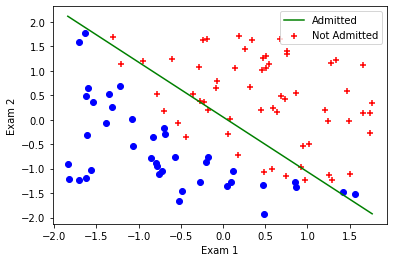

Cost is:  [0.4775347]
Cost is:  [0.47719699]
Cost is:  [0.47686017]
Cost is:  [0.47652426]
Cost is:  [0.47618925]
Cost is:  [0.47585514]
Cost is:  [0.47552192]
Cost is:  [0.4751896]
Cost is:  [0.47485818]
Cost is:  [0.47452766]


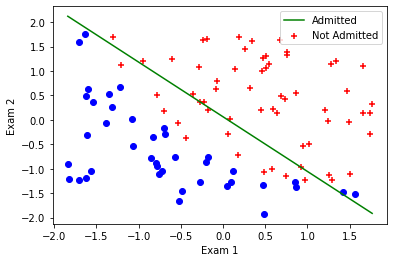

Cost is:  [0.47419803]
Cost is:  [0.4738693]
Cost is:  [0.47354146]
Cost is:  [0.47321452]
Cost is:  [0.47288846]
Cost is:  [0.47256331]
Cost is:  [0.47223904]
Cost is:  [0.47191566]
Cost is:  [0.47159318]
Cost is:  [0.47127158]


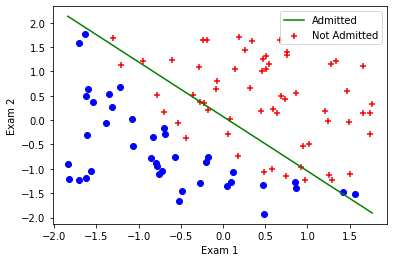

Cost is:  [0.47095088]
Cost is:  [0.47063106]
Cost is:  [0.47031213]
Cost is:  [0.46999409]
Cost is:  [0.46967693]
Cost is:  [0.46936067]
Cost is:  [0.46904528]
Cost is:  [0.46873078]
Cost is:  [0.46841717]
Cost is:  [0.46810443]


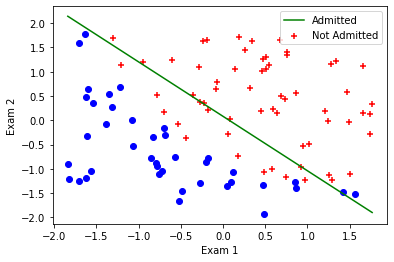

Cost is:  [0.46779258]
Cost is:  [0.46748162]
Cost is:  [0.46717153]
Cost is:  [0.46686233]
Cost is:  [0.466554]
Cost is:  [0.46624655]
Cost is:  [0.46593999]
Cost is:  [0.4656343]
Cost is:  [0.46532948]
Cost is:  [0.46502555]


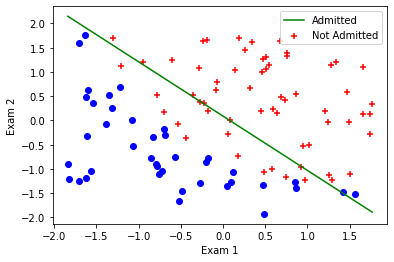

Cost is:  [0.46472249]
Cost is:  [0.46442031]
Cost is:  [0.464119]
Cost is:  [0.46381856]
Cost is:  [0.463519]
Cost is:  [0.46322031]
Cost is:  [0.46292249]
Cost is:  [0.46262555]
Cost is:  [0.46232947]
Cost is:  [0.46203427]


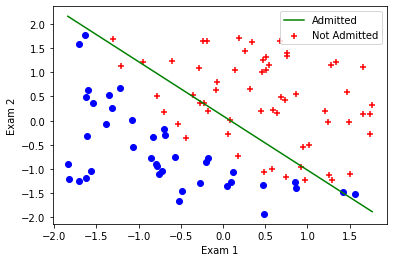

Cost is:  [0.46173993]
Cost is:  [0.46144646]
Cost is:  [0.46115386]
Cost is:  [0.46086213]
Cost is:  [0.46057127]
Cost is:  [0.46028127]
Cost is:  [0.45999213]
Cost is:  [0.45970386]
Cost is:  [0.45941646]
Cost is:  [0.45912992]


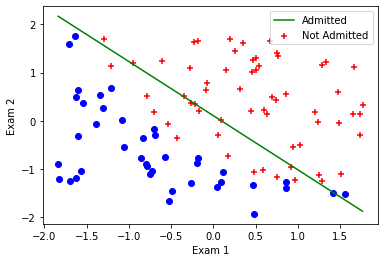

Cost is:  [0.45884424]
Cost is:  [0.45855942]
Cost is:  [0.45827546]
Cost is:  [0.45799237]
Cost is:  [0.45771013]
Cost is:  [0.45742876]
Cost is:  [0.45714824]
Cost is:  [0.45686858]
Cost is:  [0.45658978]
Cost is:  [0.45631183]


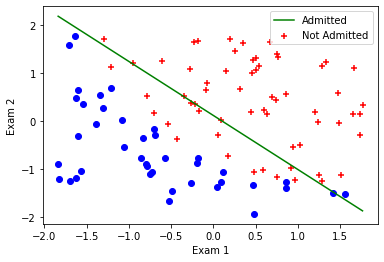

Cost is:  [0.45603474]
Cost is:  [0.4557585]
Cost is:  [0.45548312]
Cost is:  [0.4552086]
Cost is:  [0.45493492]
Cost is:  [0.4546621]
Cost is:  [0.45439013]
Cost is:  [0.45411902]
Cost is:  [0.45384875]
Cost is:  [0.45357933]


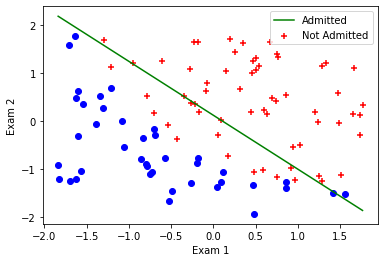

Cost is:  [0.45331076]
Cost is:  [0.45304304]
Cost is:  [0.45277617]
Cost is:  [0.45251014]
Cost is:  [0.45224497]
Cost is:  [0.45198063]
Cost is:  [0.45171714]
Cost is:  [0.4514545]
Cost is:  [0.4511927]
Cost is:  [0.45093174]


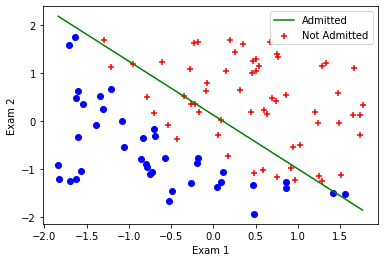

Cost is:  [0.45067163]
Cost is:  [0.45041235]
Cost is:  [0.45015392]
Cost is:  [0.44989633]
Cost is:  [0.44963958]
Cost is:  [0.44938366]
Cost is:  [0.44912859]
Cost is:  [0.44887435]
Cost is:  [0.44862095]
Cost is:  [0.44836838]


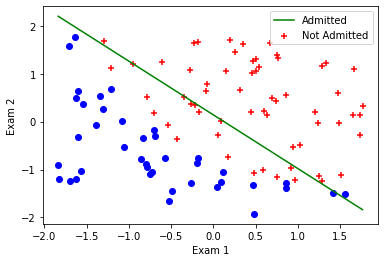

Cost is:  [0.44811665]
Cost is:  [0.44786576]
Cost is:  [0.44761569]
Cost is:  [0.44736647]
Cost is:  [0.44711807]
Cost is:  [0.44687051]
Cost is:  [0.44662378]
Cost is:  [0.44637787]
Cost is:  [0.4461328]
Cost is:  [0.44588856]


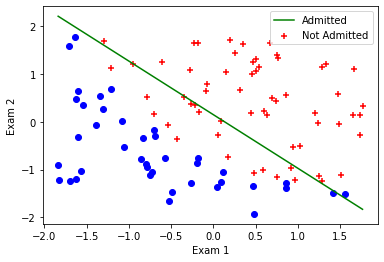

Cost is:  [0.44564515]
Cost is:  [0.44540256]
Cost is:  [0.4451608]
Cost is:  [0.44491987]
Cost is:  [0.44467976]
Cost is:  [0.44444048]
Cost is:  [0.44420202]
Cost is:  [0.44396439]
Cost is:  [0.44372758]
Cost is:  [0.44349159]


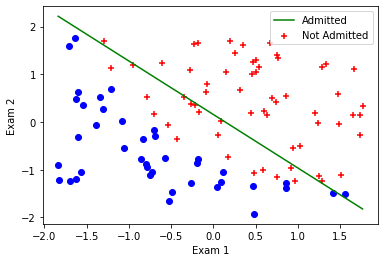

Cost is:  [0.44325642]
Cost is:  [0.44302208]
Cost is:  [0.44278855]
Cost is:  [0.44255585]
Cost is:  [0.44232396]
Cost is:  [0.44209289]
Cost is:  [0.44186264]
Cost is:  [0.4416332]
Cost is:  [0.44140459]
Cost is:  [0.44117678]


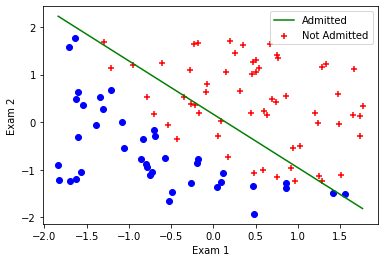

Cost is:  [0.44094979]
Cost is:  [0.44072362]
Cost is:  [0.44049826]
Cost is:  [0.44027371]
Cost is:  [0.44004997]
Cost is:  [0.43982704]
Cost is:  [0.43960493]
Cost is:  [0.43938362]
Cost is:  [0.43916312]
Cost is:  [0.43894343]


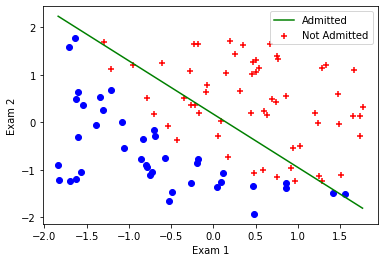

Cost is:  [0.43872455]
Cost is:  [0.43850648]
Cost is:  [0.43828921]
Cost is:  [0.43807275]
Cost is:  [0.43785709]
Cost is:  [0.43764224]
Cost is:  [0.43742819]
Cost is:  [0.43721494]
Cost is:  [0.4370025]
Cost is:  [0.43679085]


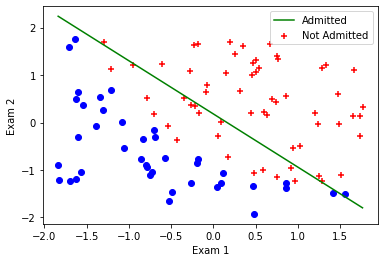

Cost is:  [0.43658001]
Cost is:  [0.43636996]
Cost is:  [0.43616072]
Cost is:  [0.43595227]
Cost is:  [0.43574463]
Cost is:  [0.43553778]
Cost is:  [0.43533172]
Cost is:  [0.43512646]
Cost is:  [0.434922]
Cost is:  [0.43471833]


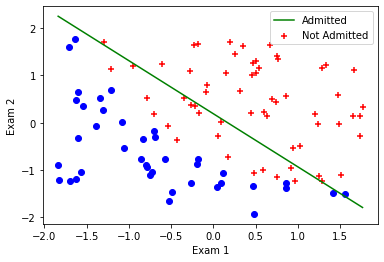

Cost is:  [0.43451545]
Cost is:  [0.43431337]
Cost is:  [0.43411208]
Cost is:  [0.43391158]
Cost is:  [0.43371187]
Cost is:  [0.43351295]
Cost is:  [0.43331482]
Cost is:  [0.43311748]
Cost is:  [0.43292093]
Cost is:  [0.43272517]


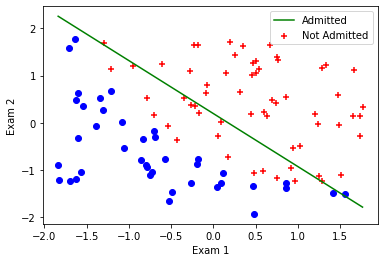

Cost is:  [0.43253019]
Cost is:  [0.43233599]
Cost is:  [0.43214259]
Cost is:  [0.43194996]
Cost is:  [0.43175812]
Cost is:  [0.43156707]
Cost is:  [0.43137679]
Cost is:  [0.4311873]
Cost is:  [0.43099858]
Cost is:  [0.43081065]


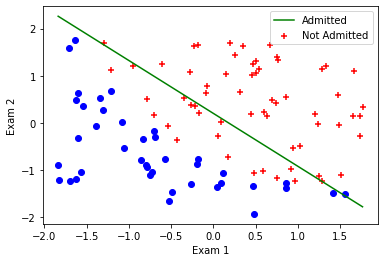

Cost is:  [0.4306235]
Cost is:  [0.43043713]
Cost is:  [0.43025153]
Cost is:  [0.43006671]
Cost is:  [0.42988267]
Cost is:  [0.4296994]
Cost is:  [0.42951691]
Cost is:  [0.42933519]
Cost is:  [0.42915425]
Cost is:  [0.42897408]


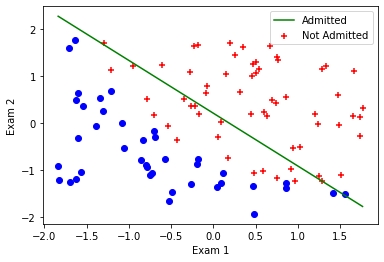

Cost is:  [0.42879468]
Cost is:  [0.42861606]
Cost is:  [0.4284382]
Cost is:  [0.42826112]
Cost is:  [0.4280848]
Cost is:  [0.42790926]
Cost is:  [0.42773448]
Cost is:  [0.42756047]
Cost is:  [0.42738722]
Cost is:  [0.42721474]


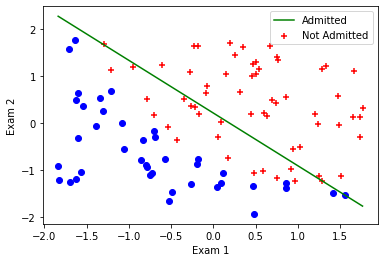

Cost is:  [0.42704303]
Cost is:  [0.42687208]
Cost is:  [0.42670189]
Cost is:  [0.42653247]
Cost is:  [0.42636381]
Cost is:  [0.42619591]
Cost is:  [0.42602877]
Cost is:  [0.4258624]
Cost is:  [0.42569678]
Cost is:  [0.42553192]


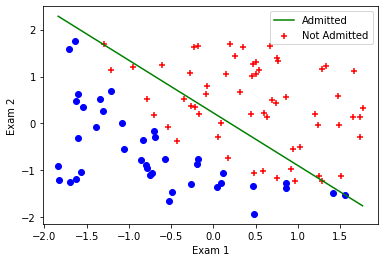

Cost is:  [0.42536782]
Cost is:  [0.42520448]
Cost is:  [0.42504189]
Cost is:  [0.42488006]
Cost is:  [0.42471898]
Cost is:  [0.42455866]
Cost is:  [0.42439909]
Cost is:  [0.42424028]
Cost is:  [0.42408222]
Cost is:  [0.42392491]


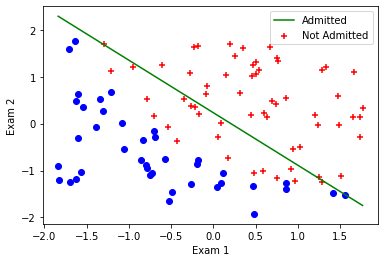

Cost is:  [0.42376835]
Cost is:  [0.42361254]
Cost is:  [0.42345748]
Cost is:  [0.42330316]
Cost is:  [0.4231496]
Cost is:  [0.42299679]
Cost is:  [0.42284472]
Cost is:  [0.42269339]
Cost is:  [0.42254282]
Cost is:  [0.42239298]


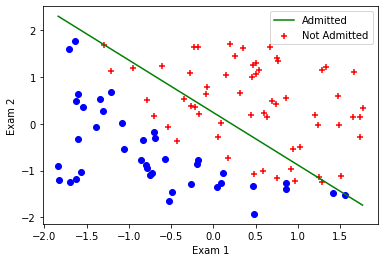

Cost is:  [0.42224389]
Cost is:  [0.42209554]
Cost is:  [0.42194794]
Cost is:  [0.42180108]
Cost is:  [0.42165496]
Cost is:  [0.42150957]
Cost is:  [0.42136493]
Cost is:  [0.42122103]
Cost is:  [0.42107786]
Cost is:  [0.42093543]


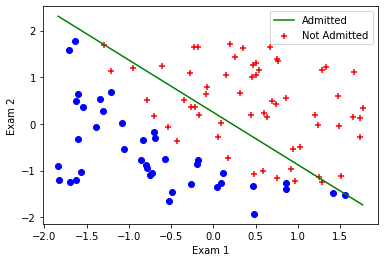

Cost is:  [0.42079374]
Cost is:  [0.42065279]
Cost is:  [0.42051257]
Cost is:  [0.42037308]
Cost is:  [0.42023433]
Cost is:  [0.42009631]
Cost is:  [0.41995902]
Cost is:  [0.41982246]
Cost is:  [0.41968664]
Cost is:  [0.41955155]


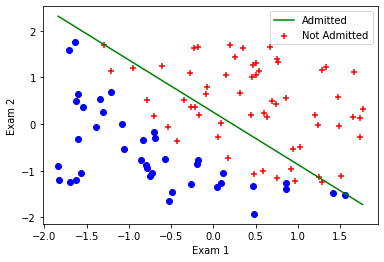

Cost is:  [0.41941718]
Cost is:  [0.41928354]
Cost is:  [0.41915064]
Cost is:  [0.41901846]
Cost is:  [0.418887]
Cost is:  [0.41875627]
Cost is:  [0.41862627]
Cost is:  [0.41849699]
Cost is:  [0.41836844]
Cost is:  [0.4182406]


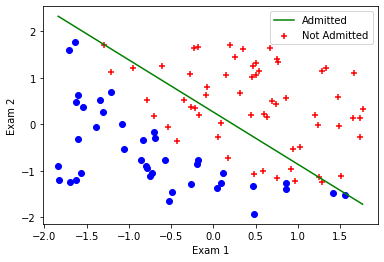

Cost is:  [0.41811349]
Cost is:  [0.4179871]
Cost is:  [0.41786144]
Cost is:  [0.41773649]
Cost is:  [0.41761226]
Cost is:  [0.41748875]
Cost is:  [0.41736596]
Cost is:  [0.41724389]
Cost is:  [0.41712253]
Cost is:  [0.41700189]


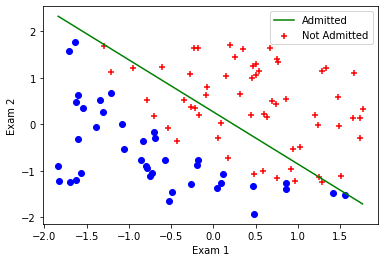

Cost is:  [0.41688196]
Cost is:  [0.41676275]
Cost is:  [0.41664425]
Cost is:  [0.41652647]
Cost is:  [0.41640939]
Cost is:  [0.41629303]
Cost is:  [0.41617738]
Cost is:  [0.41606244]
Cost is:  [0.41594821]
Cost is:  [0.41583469]


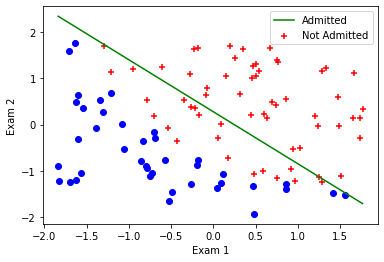

Cost is:  [0.41572187]
Cost is:  [0.41560977]
Cost is:  [0.41549837]
Cost is:  [0.41538767]
Cost is:  [0.41527768]
Cost is:  [0.4151684]
Cost is:  [0.41505981]
Cost is:  [0.41495194]
Cost is:  [0.41484476]
Cost is:  [0.41473829]


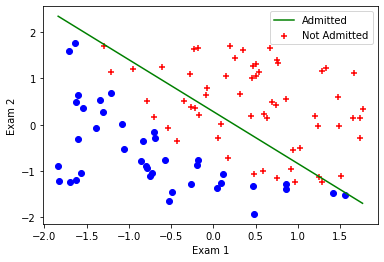

Cost is:  [0.41463251]
Cost is:  [0.41452744]
Cost is:  [0.41442306]
Cost is:  [0.41431939]
Cost is:  [0.41421641]
Cost is:  [0.41411413]
Cost is:  [0.41401255]
Cost is:  [0.41391166]
Cost is:  [0.41381147]
Cost is:  [0.41371197]


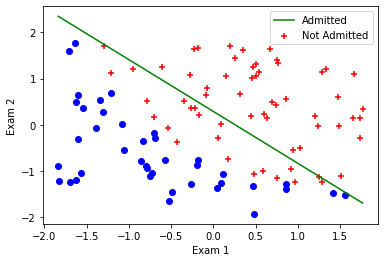

Cost is:  [0.41361316]
Cost is:  [0.41351505]
Cost is:  [0.41341763]
Cost is:  [0.4133209]
Cost is:  [0.41322487]
Cost is:  [0.41312952]
Cost is:  [0.41303486]
Cost is:  [0.4129409]
Cost is:  [0.41284762]
Cost is:  [0.41275502]


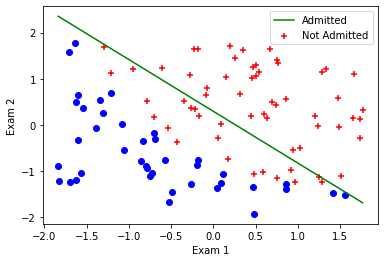

Cost is:  [0.41266312]
Cost is:  [0.41257189]
Cost is:  [0.41248136]
Cost is:  [0.41239151]
Cost is:  [0.41230234]
Cost is:  [0.41221386]
Cost is:  [0.41212606]
Cost is:  [0.41203894]
Cost is:  [0.4119525]
Cost is:  [0.41186674]


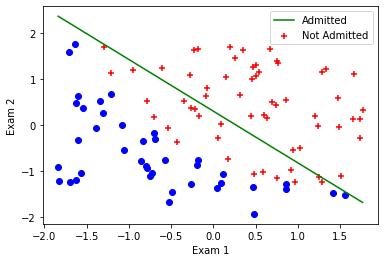

Cost is:  [0.41178166]
Cost is:  [0.41169726]
Cost is:  [0.41161353]
Cost is:  [0.41153049]
Cost is:  [0.41144812]
Cost is:  [0.41136643]
Cost is:  [0.41128541]
Cost is:  [0.41120507]
Cost is:  [0.4111254]
Cost is:  [0.4110464]


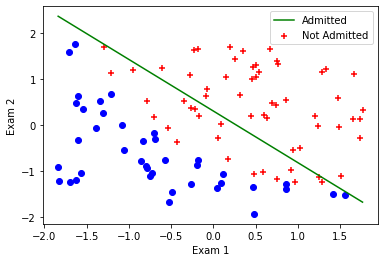

Cost is:  [0.41096808]
Cost is:  [0.41089043]
Cost is:  [0.41081345]
Cost is:  [0.41073714]
Cost is:  [0.4106615]
Cost is:  [0.41058653]
Cost is:  [0.41051222]
Cost is:  [0.41043859]
Cost is:  [0.41036562]
Cost is:  [0.41029331]


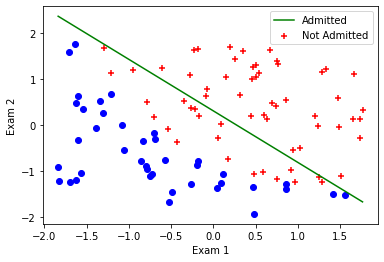

Cost is:  [0.41022168]
Cost is:  [0.4101507]
Cost is:  [0.41008039]
Cost is:  [0.41001075]
Cost is:  [0.40994176]
Cost is:  [0.40987344]
Cost is:  [0.40980578]
Cost is:  [0.40973878]
Cost is:  [0.40967244]
Cost is:  [0.40960676]


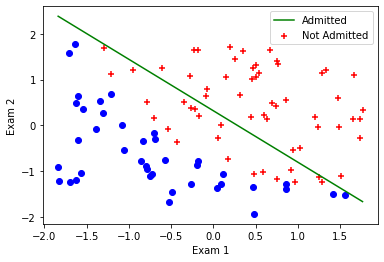

Cost is:  [0.40954174]
Cost is:  [0.40947737]
Cost is:  [0.40941367]
Cost is:  [0.40935061]
Cost is:  [0.40928822]
Cost is:  [0.40922648]
Cost is:  [0.40916539]
Cost is:  [0.40910496]
Cost is:  [0.40904517]
Cost is:  [0.40898605]


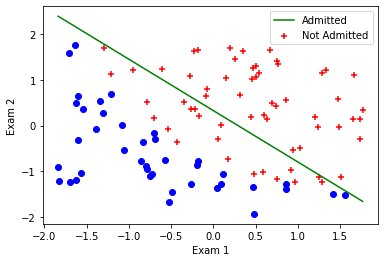

Cost is:  [0.40892757]
Cost is:  [0.40886974]
Cost is:  [0.40881256]
Cost is:  [0.40875604]
Cost is:  [0.40870016]
Cost is:  [0.40864492]
Cost is:  [0.40859034]
Cost is:  [0.4085364]
Cost is:  [0.40848311]
Cost is:  [0.40843046]


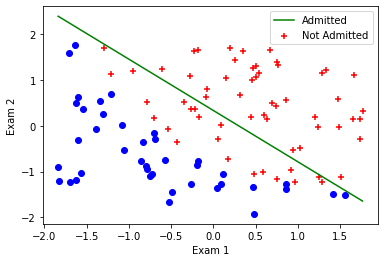

Cost is:  [0.40837846]
Cost is:  [0.4083271]
Cost is:  [0.40827638]
Cost is:  [0.40822631]
Cost is:  [0.40817688]
Cost is:  [0.40812809]
Cost is:  [0.40807994]
Cost is:  [0.40803242]
Cost is:  [0.40798555]
Cost is:  [0.40793932]


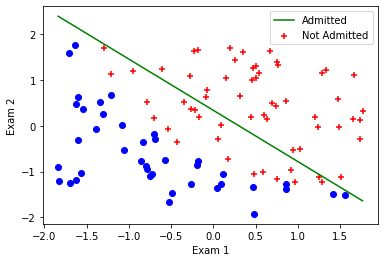

Cost is:  [0.40789372]
Cost is:  [0.40784876]
Cost is:  [0.40780443]
Cost is:  [0.40776074]
Cost is:  [0.40771769]
Cost is:  [0.40767527]
Cost is:  [0.40763348]
Cost is:  [0.40759233]
Cost is:  [0.4075518]
Cost is:  [0.40751191]


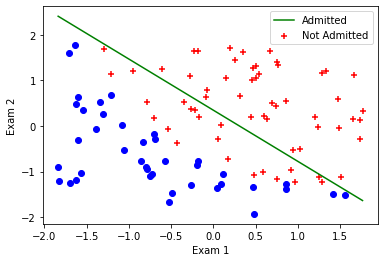

Cost is:  [0.40747265]
Cost is:  [0.40743402]
Cost is:  [0.40739602]
Cost is:  [0.40735864]
Cost is:  [0.4073219]
Cost is:  [0.40728578]
Cost is:  [0.40725029]
Cost is:  [0.40721542]
Cost is:  [0.40718118]
Cost is:  [0.40714756]


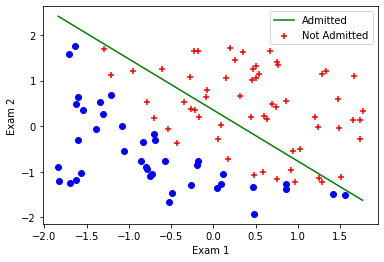

Cost is:  [0.40711456]
Cost is:  [0.40708219]
Cost is:  [0.40705044]
Cost is:  [0.40701932]
Cost is:  [0.40698881]
Cost is:  [0.40695892]
Cost is:  [0.40692966]
Cost is:  [0.40690101]
Cost is:  [0.40687298]
Cost is:  [0.40684557]


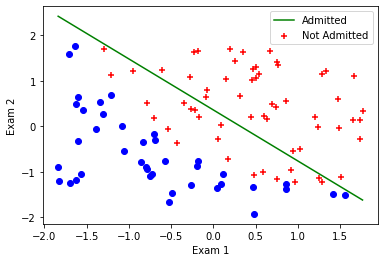

Cost is:  [0.40681877]
Cost is:  [0.40679259]
Cost is:  [0.40676703]
Cost is:  [0.40674208]
Cost is:  [0.40671774]
Cost is:  [0.40669402]
Cost is:  [0.40667091]
Cost is:  [0.40664842]
Cost is:  [0.40662653]
Cost is:  [0.40660525]


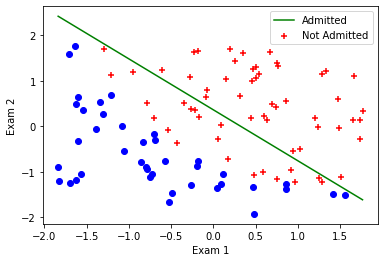

Cost is:  [0.40658459]
Cost is:  [0.40656453]
Cost is:  [0.40654509]
Cost is:  [0.40652625]
Cost is:  [0.40650801]
Cost is:  [0.40649039]
Cost is:  [0.40647337]
Cost is:  [0.40645695]
Cost is:  [0.40644114]
Cost is:  [0.40642594]


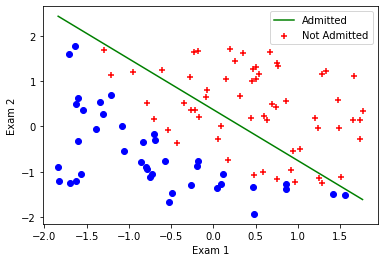

Cost is:  [0.40641134]
Cost is:  [0.40639734]
Cost is:  [0.40638394]
Cost is:  [0.40637114]
Cost is:  [0.40635894]
Cost is:  [0.40634735]
Cost is:  [0.40633635]
Cost is:  [0.40632595]
Cost is:  [0.40631615]
Cost is:  [0.40630694]


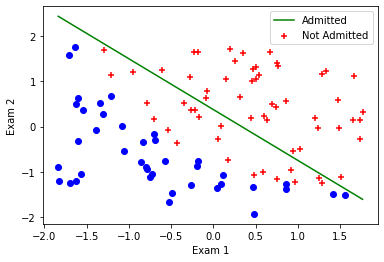

Cost is:  [0.40629834]
Cost is:  [0.40629032]
Cost is:  [0.40628291]
Cost is:  [0.40627608]
Cost is:  [0.40626986]
Cost is:  [0.40626422]
Cost is:  [0.40625918]
Cost is:  [0.40625473]
Cost is:  [0.40625087]
Cost is:  [0.4062476]


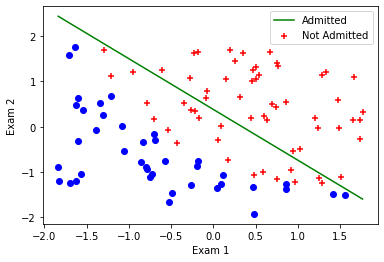

Cost is:  [0.40624492]
Cost is:  [0.40624283]
Cost is:  [0.40624132]
Cost is:  [0.40624041]
Cost is:  [0.40624008]
Cost is:  [0.40624034]
Cost is:  [0.40624119]
Cost is:  [0.40624262]
Cost is:  [0.40624463]
Cost is:  [0.40624723]


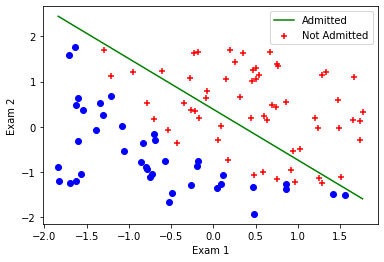

Cost is:  [0.40625041]
Cost is:  [0.40625418]
Cost is:  [0.40625852]
Cost is:  [0.40626345]
Cost is:  [0.40626896]
Cost is:  [0.40627505]
Cost is:  [0.40628171]
Cost is:  [0.40628896]
Cost is:  [0.40629678]
Cost is:  [0.40630518]


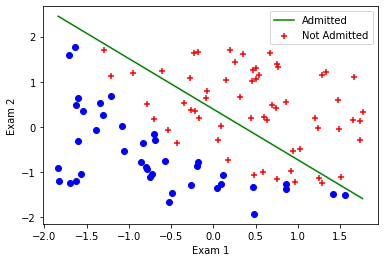

Cost is:  [0.40631416]
Cost is:  [0.40632371]
Cost is:  [0.40633384]
Cost is:  [0.40634454]
Cost is:  [0.40635582]
Cost is:  [0.40636767]
Cost is:  [0.40638009]
Cost is:  [0.40639309]
Cost is:  [0.40640665]
Cost is:  [0.40642079]


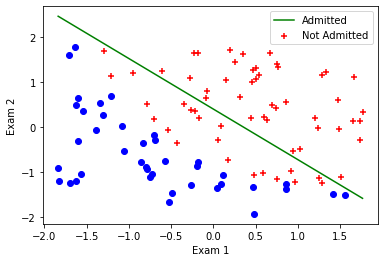

Cost is:  [0.4064355]
Cost is:  [0.40645077]
Cost is:  [0.40646662]
Cost is:  [0.40648303]
Cost is:  [0.40650001]
Cost is:  [0.40651756]
Cost is:  [0.40653567]
Cost is:  [0.40655435]
Cost is:  [0.40657359]
Cost is:  [0.4065934]


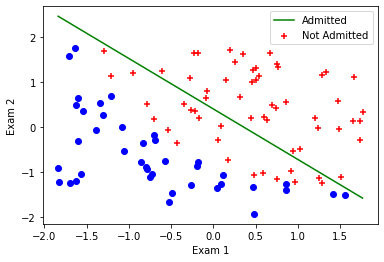

Cost is:  [0.40661377]
Cost is:  [0.4066347]
Cost is:  [0.4066562]
Cost is:  [0.40667826]
Cost is:  [0.40670088]
Cost is:  [0.40672406]
Cost is:  [0.4067478]
Cost is:  [0.40677209]
Cost is:  [0.40679695]
Cost is:  [0.40682236]


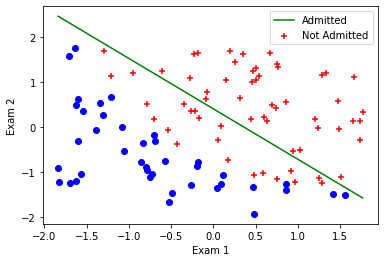

Cost is:  [0.40684833]
Cost is:  [0.40687486]
Cost is:  [0.40690194]
Cost is:  [0.40692958]
Cost is:  [0.40695778]
Cost is:  [0.40698652]
Cost is:  [0.40701582]
Cost is:  [0.40704567]
Cost is:  [0.40707608]
Cost is:  [0.40710704]


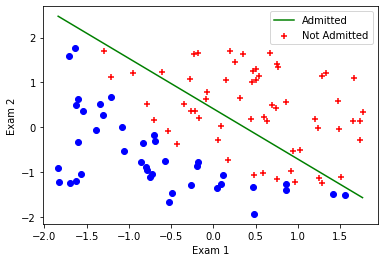

Cost is:  [0.40713854]
Cost is:  [0.4071706]
Cost is:  [0.4072032]
Cost is:  [0.40723636]
Cost is:  [0.40727006]
Cost is:  [0.40730431]
Cost is:  [0.40733911]
Cost is:  [0.40737445]
Cost is:  [0.40741034]
Cost is:  [0.40744678]


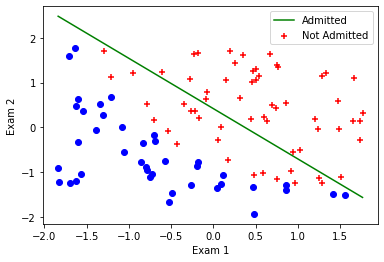

Cost is:  [0.40748376]
Cost is:  [0.40752128]
Cost is:  [0.40755934]
Cost is:  [0.40759795]
Cost is:  [0.4076371]
Cost is:  [0.40767679]
Cost is:  [0.40771702]
Cost is:  [0.40775779]
Cost is:  [0.4077991]
Cost is:  [0.40784095]


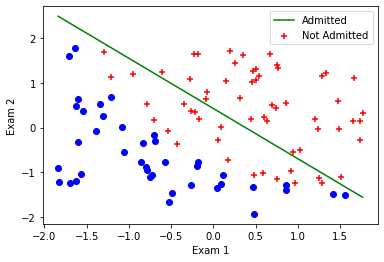

Cost is:  [0.40788334]
Cost is:  [0.40792627]
Cost is:  [0.40796973]
Cost is:  [0.40801372]
Cost is:  [0.40805826]
Cost is:  [0.40810333]
Cost is:  [0.40814893]
Cost is:  [0.40819506]
Cost is:  [0.40824173]
Cost is:  [0.40828894]


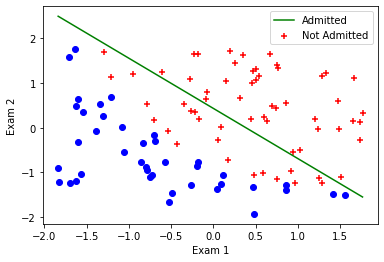

Cost is:  [0.40833667]
Cost is:  [0.40838493]
Cost is:  [0.40843373]
Cost is:  [0.40848305]
Cost is:  [0.40853291]
Cost is:  [0.40858329]
Cost is:  [0.4086342]
Cost is:  [0.40868564]
Cost is:  [0.40873761]
Cost is:  [0.4087901]


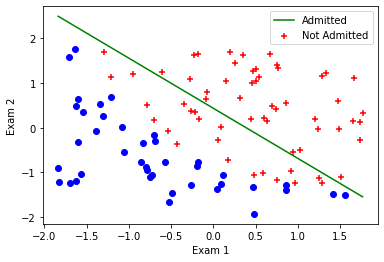

Cost is:  [0.40884312]
Cost is:  [0.40889666]
Cost is:  [0.40895073]
Cost is:  [0.40900532]
Cost is:  [0.40906043]
Cost is:  [0.40911607]
Cost is:  [0.40917223]
Cost is:  [0.40922891]
Cost is:  [0.40928611]
Cost is:  [0.40934383]


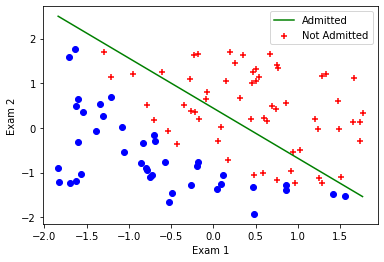

Cost is:  [0.40940207]
Cost is:  [0.40946083]
Cost is:  [0.4095201]
Cost is:  [0.4095799]
Cost is:  [0.40964021]
Cost is:  [0.40970104]
Cost is:  [0.40976238]
Cost is:  [0.40982424]
Cost is:  [0.40988662]
Cost is:  [0.40994951]


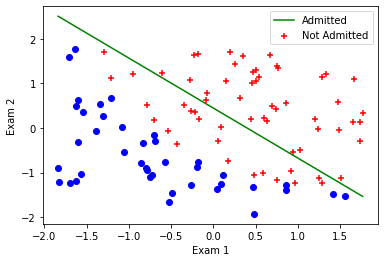

Cost is:  [0.41001291]
Cost is:  [0.41007682]
Cost is:  [0.41014125]
Cost is:  [0.41020619]
Cost is:  [0.41027164]
Cost is:  [0.4103376]
Cost is:  [0.41040407]
Cost is:  [0.41047105]
Cost is:  [0.41053854]
Cost is:  [0.41060653]


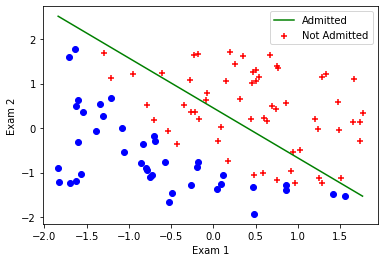

Cost is:  [0.41067503]
Cost is:  [0.41074404]
Cost is:  [0.41081356]
Cost is:  [0.41088358]
Cost is:  [0.41095411]
Cost is:  [0.41102514]
Cost is:  [0.41109667]
Cost is:  [0.41116871]
Cost is:  [0.41124125]
Cost is:  [0.4113143]


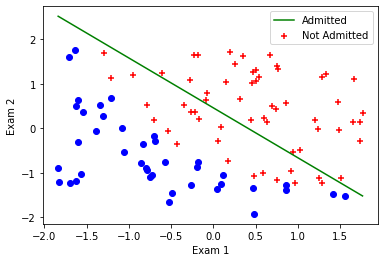

Cost is:  [0.41138784]
Cost is:  [0.41146189]
Cost is:  [0.41153643]
Cost is:  [0.41161148]
Cost is:  [0.41168702]
Cost is:  [0.41176307]
Cost is:  [0.41183961]
Cost is:  [0.41191664]
Cost is:  [0.41199418]


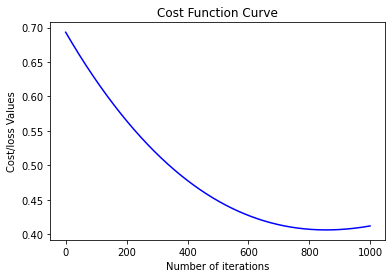

In [ ]:
#Training the model
theta,costfunctionValues=gradientDescent(X,Y,initial_theta,0.005,1000)